# TATA Global NSE Stock Price Prediction Using Stacked LSTM 

The following project involves prediction of the NSE Tata Global Stock prices using Stacked LSTM. Training and testing have been done in sizes 80/20, and the predicted values are displayed in an array. Finally, a very low RMSE value obtained is displayed and the plot of actual and predicted Close Prices are shown.

In [1]:
!pip install tensorflow

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("NSE-TATAGLOBAL.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [30]:
df.shape

(2035, 8)

In [31]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [32]:
# Count missing values in each column
missing_values_count = df.isnull().sum()

print(missing_values_count)

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64


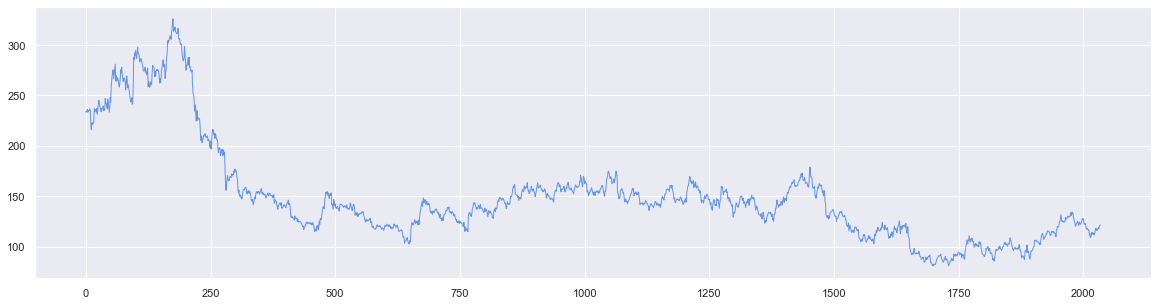

In [33]:
sns.set(rc = {'figure.figsize': (20, 5)})
fig1 = df['Close'].plot(linewidth = 1,color='cornflowerblue')

In [34]:
for col in df.columns:
    print(col)

Date
Open
High
Low
Last
Close
Total Trade Quantity
Turnover (Lacs)


In [42]:
df

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...
2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31


In [43]:
# Extract the 'Close' prices
data = df['Close'].values
data = data.reshape(-1, 1)

In [45]:
# Scale the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [46]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

In [47]:
# Create sequences of data for LSTM training
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [48]:
seq_length = 10  # Length of the input sequence
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [49]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [50]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
102/102 [==============================] - 9s 13ms/step - loss: 0.0107
Epoch 2/10
102/102 [==============================] - 1s 11ms/step - loss: 8.9908e-04
Epoch 3/10
102/102 [==============================] - 2s 16ms/step - loss: 9.7038e-04
Epoch 4/10
102/102 [==============================] - 1s 13ms/step - loss: 8.9374e-04
Epoch 5/10
102/102 [==============================] - 1s 13ms/step - loss: 8.7114e-04
Epoch 6/10
102/102 [==============================] - 1s 14ms/step - loss: 8.1157e-04
Epoch 7/10
102/102 [==============================] - 1s 12ms/step - loss: 8.4118e-04
Epoch 8/10
102/102 [==============================] - 1s 12ms/step - loss: 8.0669e-04
Epoch 9/10
102/102 [==============================] - 1s 12ms/step - loss: 6.9707e-04
Epoch 10/10
102/102 [==============================] - 1s 12ms/step - loss: 6.9977e-04


In [51]:
# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Training Loss: {train_loss:.4f}')
print(f'Testing Loss: {test_loss:.4f}')

Training Loss: 0.0007
Testing Loss: 0.0004


In [53]:
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

13/13 [==============================] - 0s 6ms/step


In [55]:
# Inverse transform the predictions to get actual prices
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

In [59]:
test_predictions

array([[0.16588733],
       [0.16522855],
       [0.16536501],
       [0.16592795],
       [0.16672388],
       [0.1681324 ],
       [0.16891614],
       [0.16999006],
       [0.16964522],
       [0.16704011],
       [0.16389126],
       [0.1622237 ],
       [0.1580823 ],
       [0.1526202 ],
       [0.1463429 ],
       [0.13672549],
       [0.12579429],
       [0.11412345],
       [0.10285474],
       [0.09234224],
       [0.08313601],
       [0.07603179],
       [0.07123218],
       [0.0691874 ],
       [0.06954658],
       [0.07034584],
       [0.07038169],
       [0.06993626],
       [0.06952481],
       [0.06883293],
       [0.0680043 ],
       [0.06719737],
       [0.06646125],
       [0.06635716],
       [0.06660458],
       [0.06615168],
       [0.06478897],
       [0.06287806],
       [0.05989278],
       [0.05675707],
       [0.05397237],
       [0.05168264],
       [0.05031684],
       [0.04844677],
       [0.04617264],
       [0.04375811],
       [0.04188542],
       [0.041

In [63]:
#Checking RMSE value for determining model fit.
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predictions))

0.025775677139833048

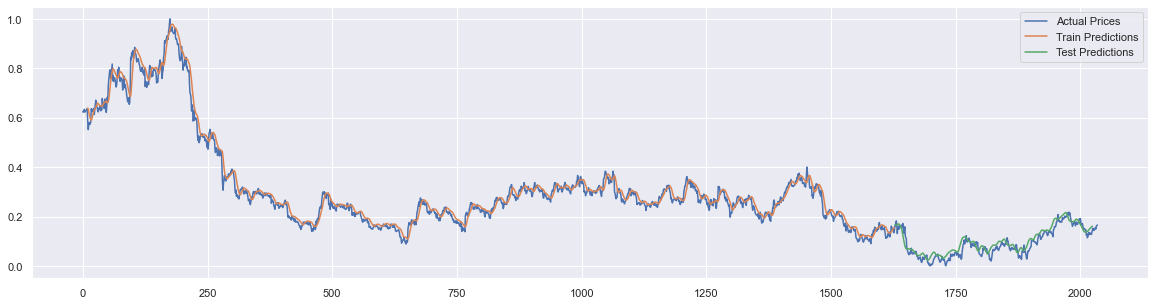

In [62]:
# Plot the predicted and actual prices
train_len = len(train_predictions)
test_len = len(test_predictions)
predicted_prices = np.concatenate((train_predictions, test_predictions))
actual_prices = scaler.inverse_transform(data)
plt.plot(actual_prices, label='Actual Prices')
plt.plot(range(seq_length, train_len+seq_length), train_predictions, label='Train Predictions')
plt.plot(range(train_len+seq_length, train_len+seq_length+test_len), test_predictions, label='Test Predictions')
plt.legend()
plt.show()